/tmp/ipykernel_15640/511178448.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(caminhos[nome_var], delim_whitespace=True, header=None)


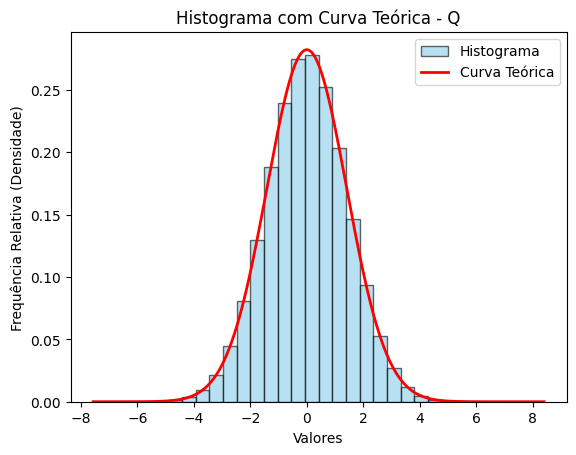

/tmp/ipykernel_15640/511178448.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(caminhos[nome_var], delim_whitespace=True, header=None)


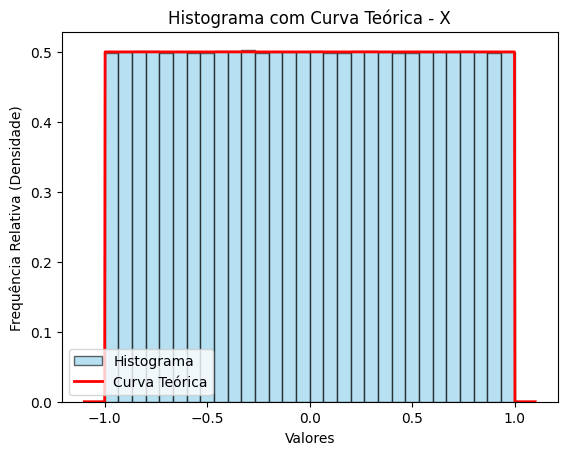

/tmp/ipykernel_15640/511178448.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(caminhos[nome_var], delim_whitespace=True, header=None)


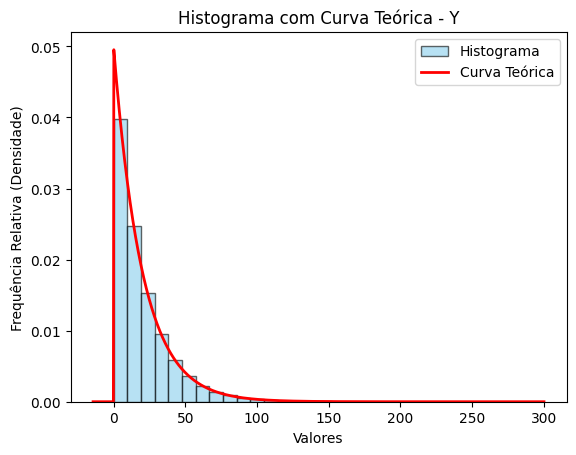

/tmp/ipykernel_15640/511178448.py:25: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(caminhos[nome_var], delim_whitespace=True, header=None)


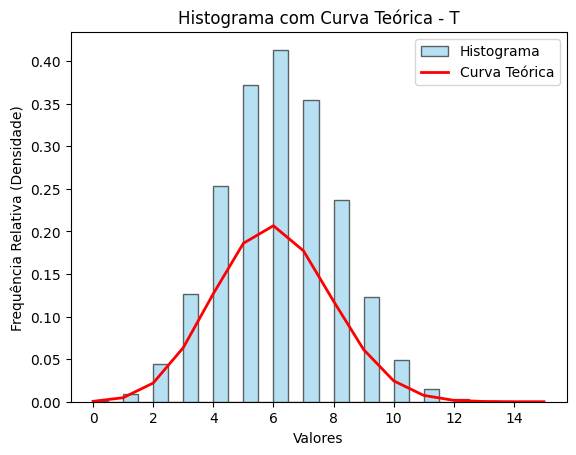

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon, binom

# Caminhos dos arquivos de dados
caminhos = {
    "Q": "/home/welber_paraizo/Documentos/Estatistica/data1q.dat",
    "X": "/home/welber_paraizo/Documentos/Estatistica/data1x.dat",
    "Y": "/home/welber_paraizo/Documentos/Estatistica/data1y.dat",
    "T": "/home/welber_paraizo/Documentos/Estatistica/data1t.dat"
}

# Parâmetros teóricos das distribuições
parametros = {
    "Q": {"dist": norm, "args": (0, np.sqrt(2))},       # Normal(0, 2)
    "X": {"dist": uniform, "args": (-1, 2)},             # Uniforme(-1, 1)
    "Y": {"dist": expon, "args": (0, 1/0.05)},           # Exponencial(lambda=0.05)
    "T": {"dist": binom, "args": (15, 0.4)}              # Binomial(15, 0.4)
}

# Função para carregar, plotar o histograma e sobrepor a curva teórica
def plot_histograma_frequencia_relativa(nome_var):
    # Carregar dados
    data = pd.read_csv(caminhos[nome_var], delim_whitespace=True, header=None)
    
    # Definir o número de bins
    num_bins = 30
    
    # Plotar histograma de frequência relativa
    plt.hist(data[0], bins=num_bins, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Histograma")
    
    # Gerar a curva teórica
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    if nome_var != "T":  # T é binomial discreta
        curva_teorica = parametros[nome_var]["dist"].pdf(x, *parametros[nome_var]["args"])
    else:
        x = np.arange(0, 16)
        curva_teorica = parametros[nome_var]["dist"].pmf(x, *parametros[nome_var]["args"])

    # Plotar a curva teórica sobre o histograma
    plt.plot(x, curva_teorica, '-r', linewidth=2, label="Curva Teórica")
    plt.title(f"Histograma com Curva Teórica - {nome_var}")
    plt.xlabel('Valores')
    plt.ylabel('Frequência Relativa (Densidade)')
    plt.legend()
    plt.show()

# Plotar histogramas para todas as variáveis
for var in ["Q", "X", "Y", "T"]:
    plot_histograma_frequencia_relativa(var)
